In [2]:

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')
df.head()


,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


Removing unnecessary columns

L7protocol and protocol name are mapped with each other as protocol name is categorical and L7protocol is already in numerical we remove protocol feature.

All the features having constant value over the dataset are removed. Below is list of features:

Label,Bwd.Avg.Bulk.Rate,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Fwd.Avg.Bytes.Bulk,CWE.Flag.Count,Bwd.URG.Flags,Fwd.URG.Flags,Bwd.PSH.Flags,Label

In [4]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [4]:
df.drop(columns=['Bwd.Avg.Bulk.Rate','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Fwd.Avg.Bytes.Bulk','CWE.Flag.Count','Bwd.URG.Flags','Fwd.URG.Flags','Bwd.PSH.Flags','Label'], inplace=True)

In [6]:
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY


In [7]:
df.columns


Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance',
      

Removing unwanted columns:

ECE.Flag.Count,URG.Flag.Count,ACK.Flag.Count,PSH.Flag.Count,RST.Flag.Count,SYN.Flag.Count,FIN.Flag.Count,Fwd.PSH.Flags,Protocol

In [5]:
df.drop(columns=['ECE.Flag.Count','URG.Flag.Count','ACK.Flag.Count','PSH.Flag.Count','RST.Flag.Count','SYN.Flag.Count','FIN.Flag.Count','Fwd.PSH.Flags','Flow.ID'], inplace=True)

In [9]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY


In [6]:

null_counts = df.isnull().sum()
features_with_nulls = null_counts[null_counts > 0]

for feature, null_count in features_with_nulls.items():
    print("Feature '{feature}' has {null_count} null values.")


from above we can see that there are no null values in any feature in dataset.

In [11]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

In [12]:
df.shape

(3577296, 67)

<Axes: ylabel='count'>

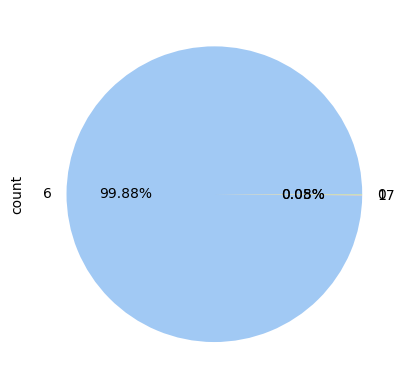

In [13]:
protocol_cnt=df['Protocol'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(protocol_cnt)]
protocol_cnt.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='count'>

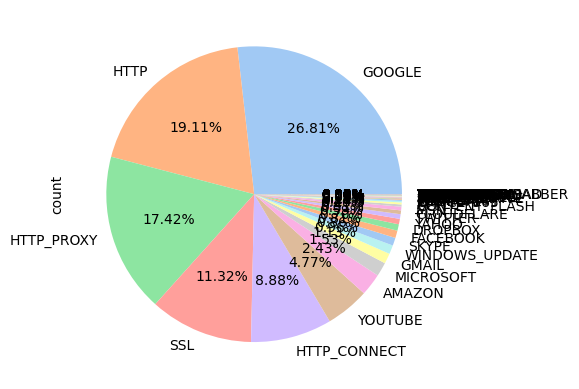

In [14]:
ProtocolName_cnt=df['ProtocolName'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(ProtocolName_cnt)]
ProtocolName_cnt.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

In [15]:
df['Protocol']

0          6
1          6
2          6
3          6
4          6
          ..
3577291    6
3577292    6
3577293    6
3577294    6
3577295    6
Name: Protocol, Length: 3577296, dtype: int64

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


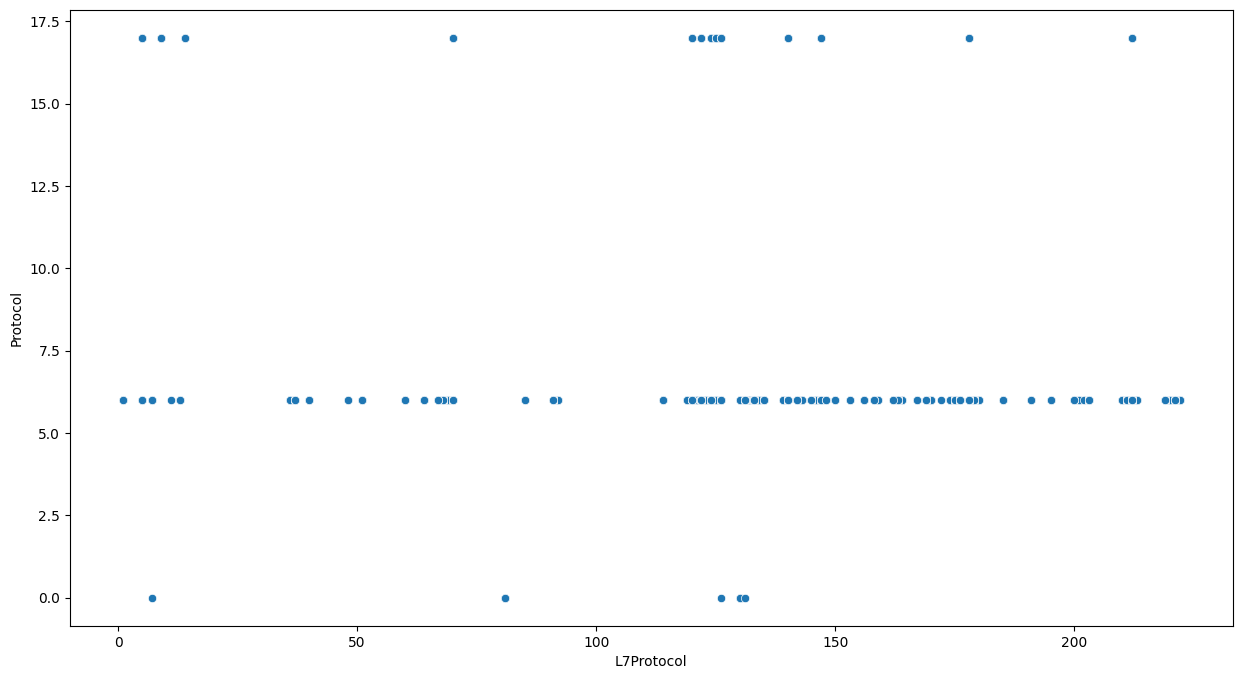

In [16]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["L7Protocol"], y=df["Protocol"], sizes=(20, 200), legend="full")

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


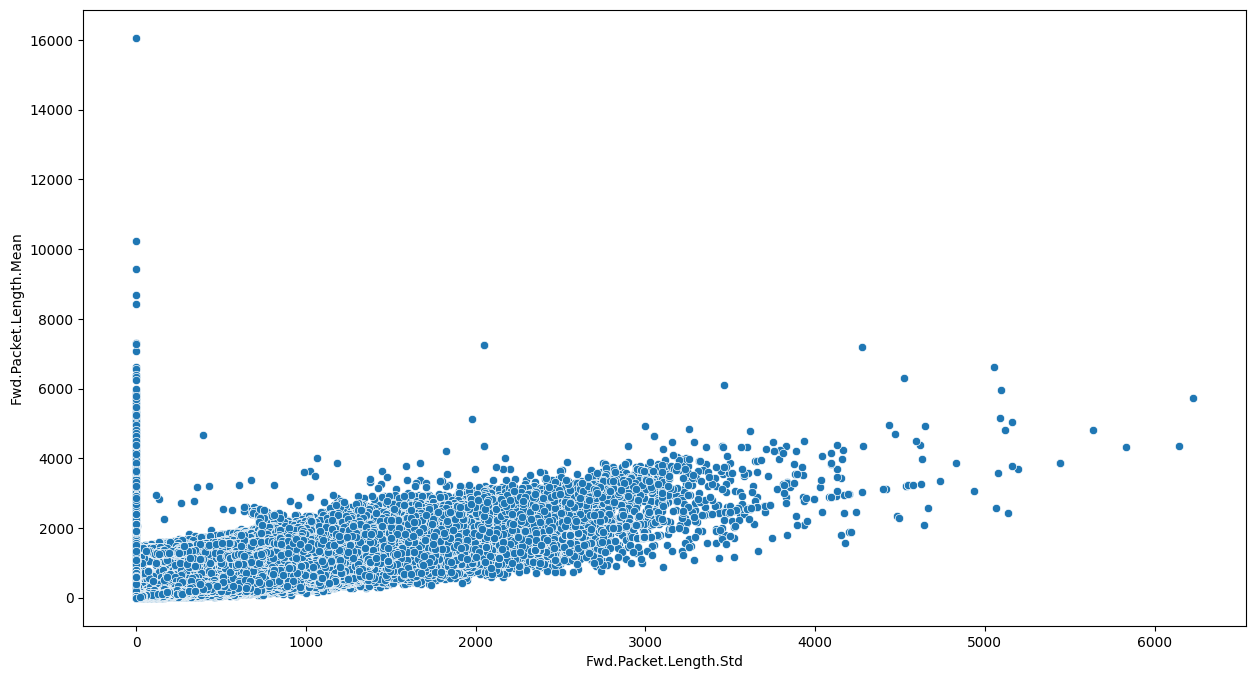

In [17]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Fwd.Packet.Length.Std"], y=df["Fwd.Packet.Length.Mean"], sizes=(20, 200), legend="full")

<Axes: >

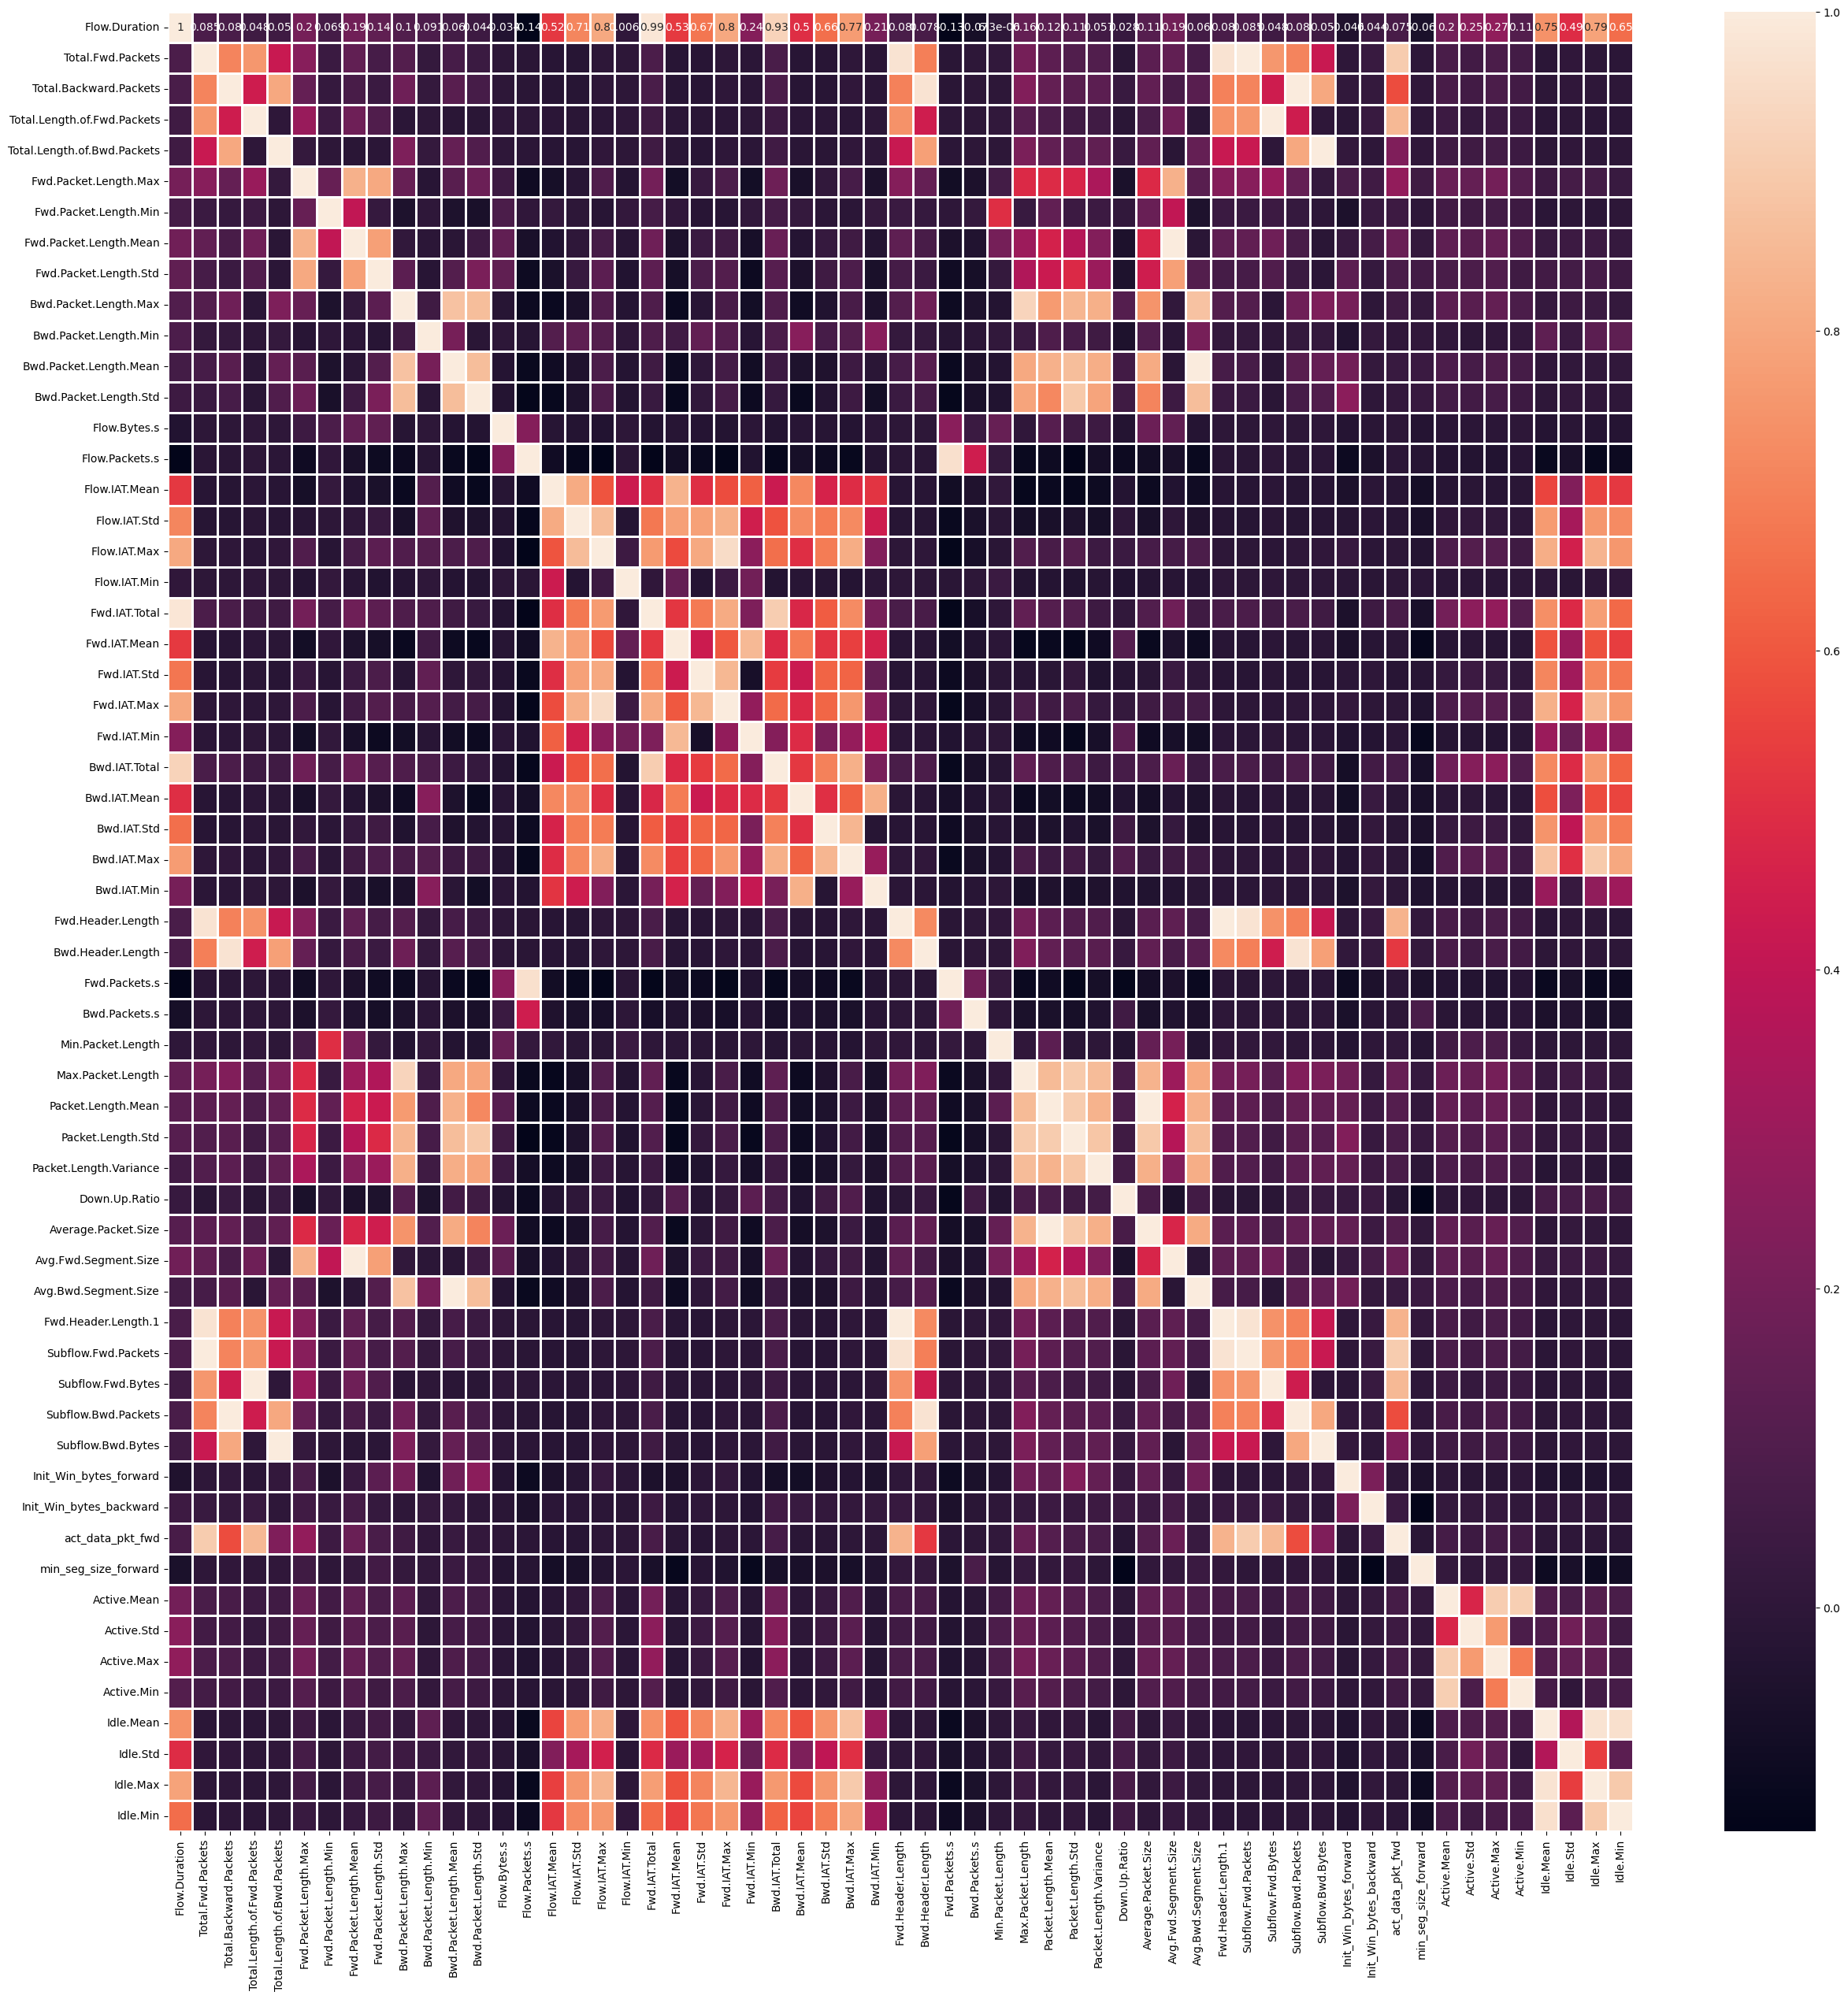

In [18]:
new_df = df[['Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min']]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)

In [19]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

1) Total.Fwd.Packets is highly corelated with Total.Backward.Packets,Total.Length.Fwd.Packets,Fwd.Header.length.1,Subflow.Fwd.Packets,Subflow.Bwd.Packets,Bwd.Header.Length,act_data_pkt_fwd,Subflow.Fwd.Bytes,Fwd.Header.Length <br><br>
2) Flow.duration is highly corelated with  Flow.IAT.Mean, 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean', 'Idle.Max', 'Idle.Min,  'Idle.Std' <br><br>
3) 'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max','Bwd.Packet.Length.Mean','Bwd.Packet.Length.Std' <br>
4)Total .length.of.BWD.Packets is highly corelated with Subflow.Bwd.Bytes <br><br>
5) Active.mean is highly co related with  'Active.Std', 'Active.Max', 'Active.Min'. <br><br>
6) 'Flow.Packets.s' is highly co related with  'Fwd.Packets.s' <br><br>
 7) 'Min.Packet.Length' is highly corelated with 'Fwd.Packet.Length.Min' <br><br>
8) 'Fwd.Packet.Length.Mean' is highly corelated with 'Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max'

In [9]:
df.drop(columns=['Total.Backward.Packets','Total.Length.of.Fwd.Packets','Fwd.Header.Length.1','Subflow.Fwd.Packets','Subflow.Bwd.Packets','Bwd.Header.Length','act_data_pkt_fwd','Subflow.Fwd.Bytes','Fwd.Header.Length'], inplace=True)

KeyError: "['Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Fwd.Header.Length.1', 'Subflow.Fwd.Packets', 'Subflow.Bwd.Packets', 'Bwd.Header.Length', 'act_data_pkt_fwd', 'Subflow.Fwd.Bytes', 'Fwd.Header.Length'] not found in axis"

In [10]:
df.drop(columns=['Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean',
        'Idle.Max', 'Idle.Min',  'Idle.Std'], inplace=True)

'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'

In [11]:
df.drop(columns=['Max.Packet.Length', 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'], inplace=True)

In [12]:
df.drop(columns=['Active.Std', 'Active.Max', 'Active.Min', 'Fwd.Packets.s','Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max','Fwd.Packet.Length.Min'], inplace=True)

In [13]:
df.drop(columns=[ 'Subflow.Bwd.Bytes'], inplace=True)

<Axes: >

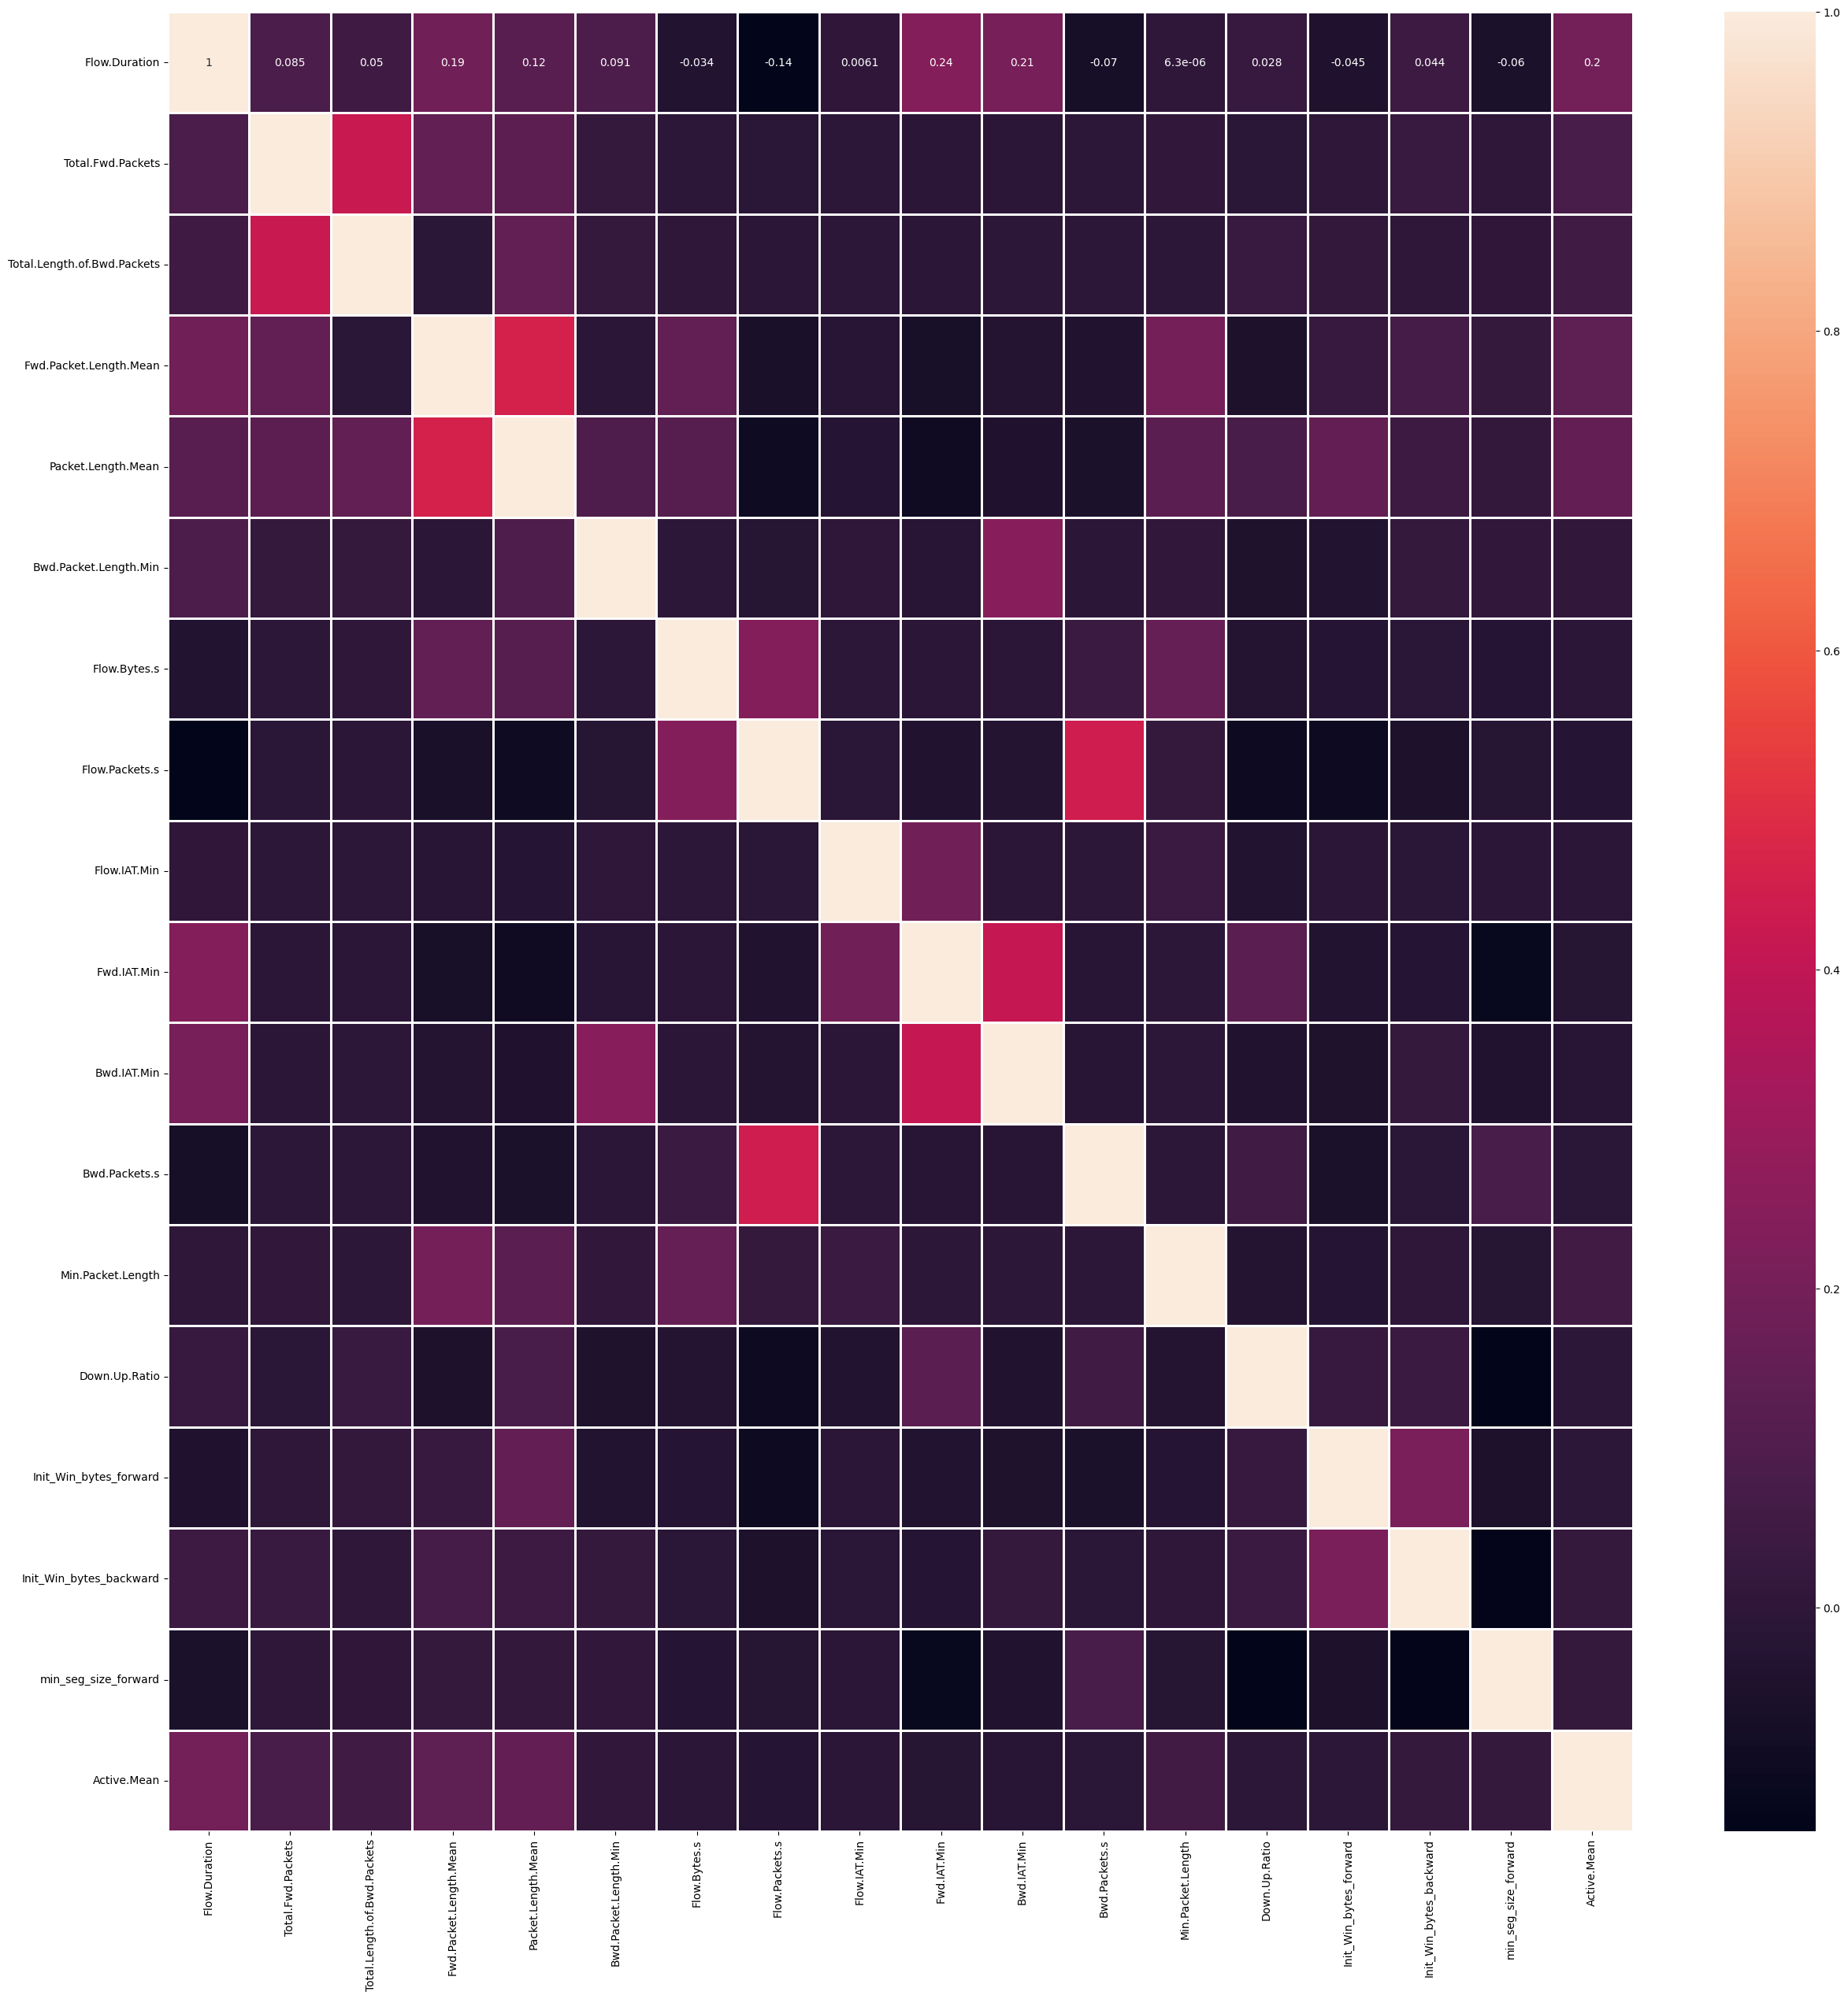

In [14]:
new_df = df[[
       'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 
        'Fwd.Packet.Length.Mean',
       'Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min',
       'Fwd.IAT.Min', 
        'Bwd.IAT.Min', 
       'Bwd.Packets.s', 'Min.Packet.Length',
        'Down.Up.Ratio', 
       
       
       'Init_Win_bytes_forward',
       'Init_Win_bytes_backward',  'min_seg_size_forward',
       'Active.Mean',
       ]]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)

In [26]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'],
      dtype='object')

In [27]:
df.shape

(3577296, 26)

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Flow.Duration', ylabel='Count'>

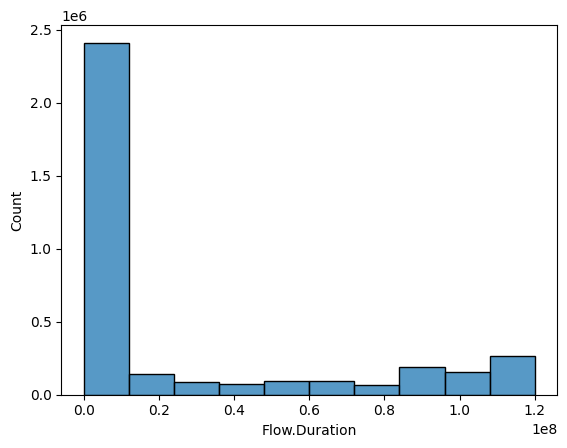

In [36]:

sns.histplot(data=df, x='Flow.Duration', bins=10)

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

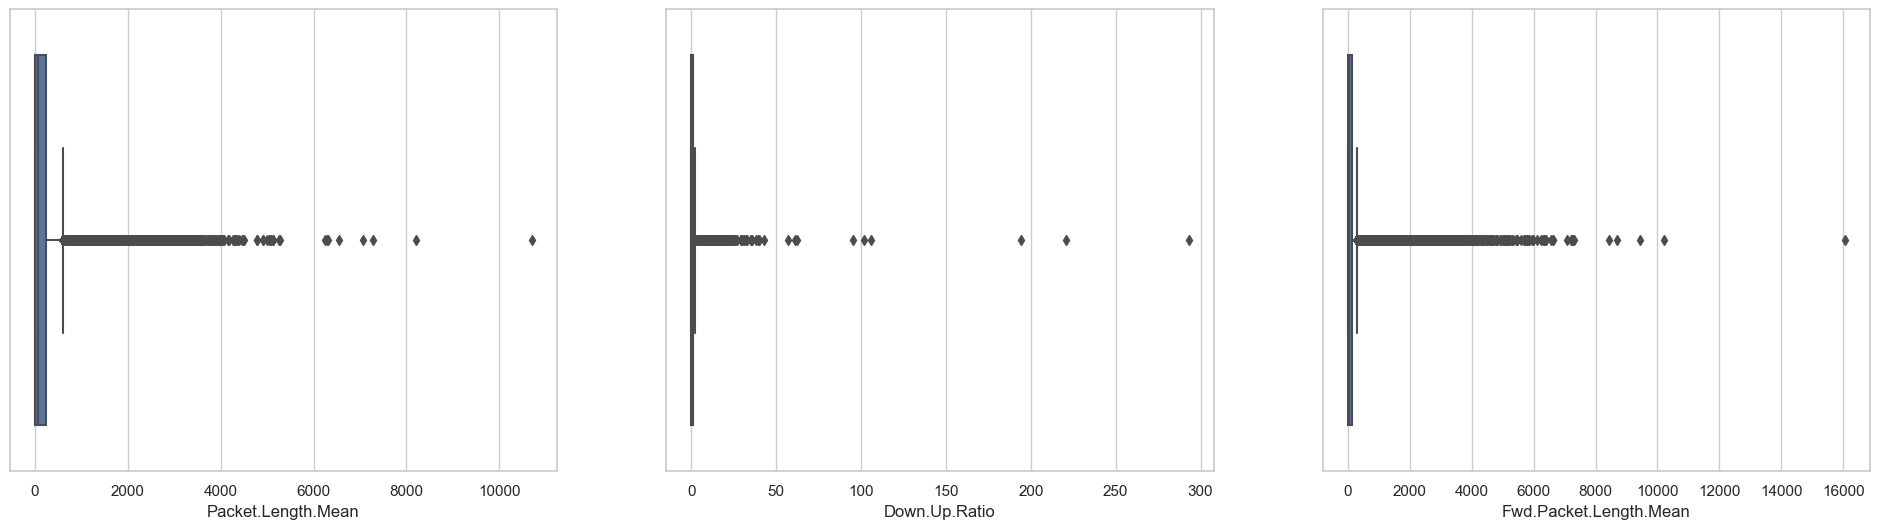

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Packet.Length.Mean", "Down.Up.Ratio", "Fwd.Packet.Length.Mean"]):
    sns.boxplot(x=df[col], ax=ax[axid])

C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dhair\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


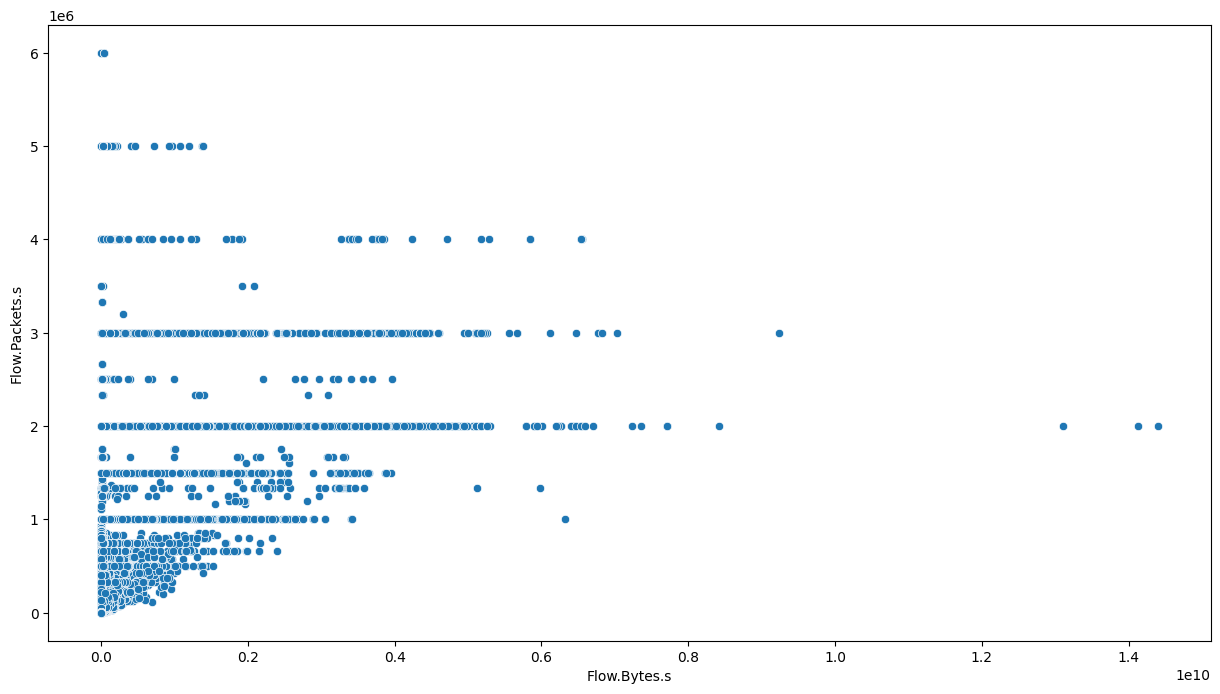

In [15]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Flow.Bytes.s"], y=df["Flow.Packets.s"], sizes=(20, 200), legend="full")